<a href="https://colab.research.google.com/github/ChelseaChauhan/Language-Detection-Comparative-Analysis/blob/main/Language_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Import of libraries and dataset

---

**Installing required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
!pip install wget
import wget
wget.download("https://raw.githubusercontent.com/yogawicaksana/helper_prabowo/main/helper_prabowo_ml.py",out="helper_prabowo_ml.py")
from helper_prabowo_ml import clean_html, remove_links, remove_special_characters, removeStopWords, remove_, remove_digits, lower, email_address, non_ascii, punct, hashtags

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=2e418559d203b9eb09c035d056c4921a0326e7658c9af3f1361c15acfb92559c
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Reading the dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Language Detection.csv')
data

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [ ]:
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


####Understanding the dataset properties

---

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [ ]:
data.shape

(10337, 2)

**Checking and counting null values**

In [ ]:
data.isnull().sum()

Text        0
Language    0
dtype: int64

**Checking and counting the duplicate values**

In [ ]:
len(data[data.duplicated()])

66

**Removing the duplicate values**

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(10271, 2)

**Counting the unique languages**

In [ ]:
data["Language"].nunique()

17

**Counting the respective language texts**

In [ ]:
data["Language"].value_counts()

English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: Language, dtype: int64

In [ ]:
data["Language"].replace(to_replace=['Portugeese','Sweedish'],value=['Portuguese','Swedish'],inplace=True)

**Visual Representation of Dataset**

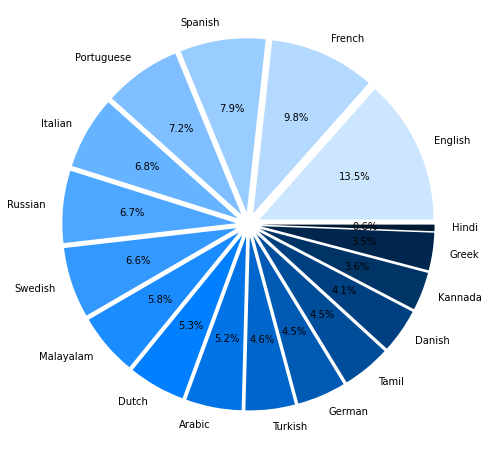

In [ ]:
from matplotlib import colors
language = data["Language"].value_counts().reset_index()
plt.figure(figsize=(8,8))
labels= language['index']
explode = (0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07)
colors= ("#cce6ff","#b3d9ff","#99ccff","#80bfff","#66b3ff","#4da6ff","#3399ff","#1a8cff","#0080ff",
"#0073e6","#0066cc","#0059b3","#004d99","#004080","#003366","#00264d","#001a33","#000d1a","#000000")
plt.pie(language["Language"], labels= labels, autopct='%.1f%%', textprops={'fontsize': 10}, explode= explode, colors= colors)
plt.show()

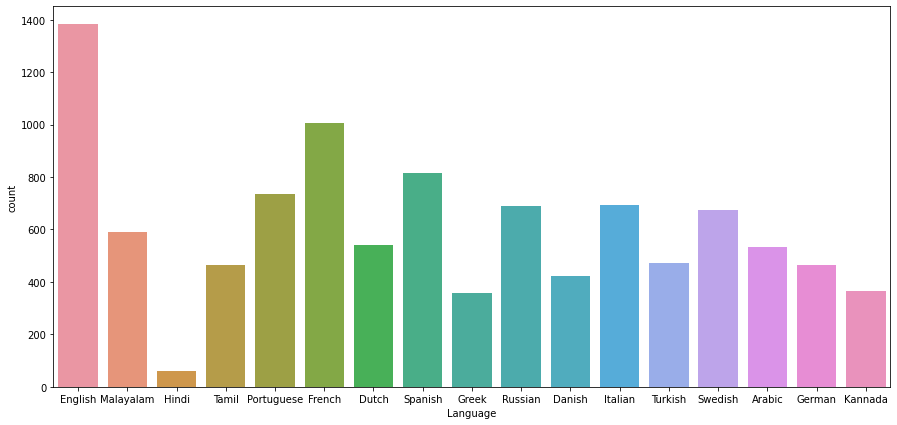

In [ ]:
countplt, ax = plt.subplots(figsize = (15,7))
ax = sns.countplot(x = data['Language'], data= data)

####Text Pre-processing

In [ ]:
data1 = data.copy()
data1["cleaned_Text"] = "" #Creating a new column for clean text
data1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,


**Eliminating the special characters/numbers and converting the text to lowercase**

In [ ]:
def clean_func(Text):
  Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)   # removing the symbols and numbers
  Text = Text.lower()   # converting the text to lower case
  Text = re.sub('#\S+', '', Text)  # remove hashtags
  Text = re.sub('@\S+', '  ', Text)  # remove mentions
  Text = re.sub('\s+', ' ', Text)  # remove extra whitespace

  return Text

In [ ]:
data1["cleaned_Text"] = data1["Text"].apply(lambda x:clean_func(x))
data1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


**Seperating input and output features**

In [ ]:
X = data1["cleaned_Text"]
y = data1["Language"]

**Encoding the target label class**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()
X = CV.fit_transform(X).toarray()

In [ ]:
X.shape

(10271, 39404)

**Splitting training and testing data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True,stratify=data1["Language"])

####Buliding and training model



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

models = {"M_Naive_Bayes" : MultinomialNB(), "Random_Forest" : RandomForestClassifier(),
          "Logistic_Regression" : LogisticRegression(), "Decision_Tree" : DecisionTreeClassifier() }

In [ ]:
for name, model in models.items():
    print( f'{name} training started...')
    model.fit(X_train, y_train)
    print(f'{name} trained.')

M_Naive_Bayes training started...
M_Naive_Bayes trained.
Random_Forest training started...
Random_Forest trained.
Logistic_Regression training started...
Logistic_Regression trained.
Decision_Tree training started...
Decision_Tree trained.


####Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Generating the accuracy scores**

In [ ]:
for name in models:
  acc_score = accuracy_score(y_test, models.get(name).predict(X_test))
  print(f'{name} accuracy score :  {acc_score}')

M_Naive_Bayes accuracy score :  0.9759896171317326
Random_Forest accuracy score :  0.9263465282284231
Logistic_Regression accuracy score :  0.9574951330304997
Decision_Tree accuracy score :  0.8653471771576898


In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       160
           1       0.87      0.75      0.81       127
           2       0.92      0.87      0.89       163
           3       0.94      0.93      0.94       415
           4       0.90      0.78      0.84       302
           5       0.91      0.87      0.89       140
           6       1.00      0.90      0.95       107
           7       1.00      0.84      0.91        19
           8       0.96      0.83      0.89       208
           9       0.34      1.00      0.51       110
          10       1.00      0.92      0.96       177
          11       0.95      0.84      0.89       221
          12       1.00      0.83      0.91       206
          13       0.74      0.90      0.81       245
          14       0.92      0.84      0.88       202
          15       1.00      0.94      0.97       139
          16       0.98      0.77      0.87       141

    accuracy              

**Generating the classification reports**

In [ ]:
for name in models:
    print(f'{name} CLASSIFICATION REPORT')
    print("-------------------------------")
    print(classification_report(y_test,models.get(name).predict(X_test)))
    print(" ")


M_Naive_Bayes CLASSIFICATION REPORT
-------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       160
           1       1.00      0.94      0.97       127
           2       0.99      0.98      0.98       163
           3       0.89      1.00      0.94       415
           4       0.98      0.99      0.99       302
           5       1.00      0.96      0.98       140
           6       1.00      0.97      0.99       107
           7       1.00      0.95      0.97        19
           8       1.00      0.97      0.98       208
           9       1.00      0.99      1.00       110
          10       0.99      0.98      0.99       177
          11       1.00      0.97      0.98       221
          12       1.00      0.95      0.97       206
          13       0.97      0.98      0.98       245
          14       0.98      0.99      0.98       202
          15       1.00      0.99      1.00       139
          16 

**Generarting the confusion matrices**

M_Naive_Bayes ConfusionMatrix
 


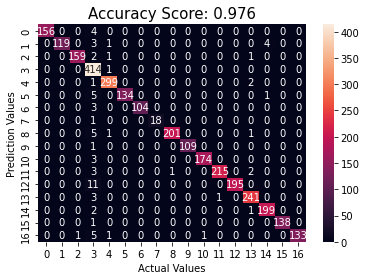

 
**********************************************
 
Random_Forest ConfusionMatrix
 


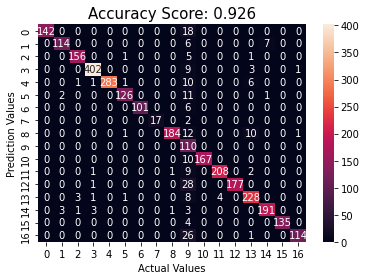

 
**********************************************
 
Logistic_Regression ConfusionMatrix
 


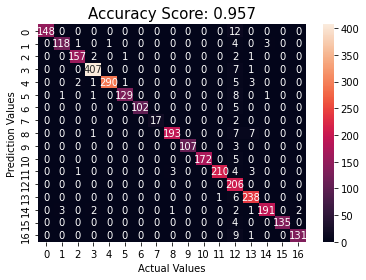

 
**********************************************
 
Decision_Tree ConfusionMatrix
 


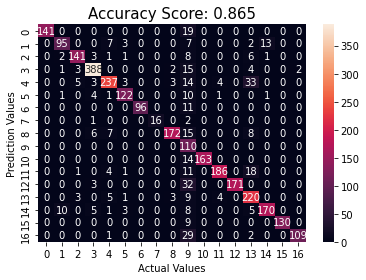

 
**********************************************
 


In [ ]:
for name in models:
    print(f'{name} ConfusionMatrix')
    predictions= models.get(name).predict(X_test)
    print(" ")
    score = round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    confusionMatrix = confusion_matrix(y_test, models.get(name).predict(X_test))
    sns.heatmap(confusionMatrix, annot=True, fmt=".0f")
    plt.xlabel('Actual Values')
    plt.ylabel('Prediction Values')
    plt.title('Accuracy Score: {0}'.format(score), size = 15)
    plt.show()
    print(" ")
    print("**********************************************")
    print(" ")

####Model Prediction

In [ ]:
def prediction(text):
  x = CV.transform([text]).toarray()  # converting text to bag of words model (Vector)
  lang = model.predict(x) # predicting the language
  lang = encoder.inverse_transform(lang) # finding the language corresponding to the predicted value
  print("The langauge is in",lang[0])

In [ ]:
prediction("Hola, me nombre es Chelsea")

The langauge is in German


In [ ]:
prediction("Η μνήμη σας βελτιώνεται καθώς μαθαίνετε μια γλώσσα. Επιπλέον, δεδομένου ότι ο εγκέφαλός σας θα μεταφραστεί αυτόματα, δίνει τη δυνατότητα στον εγκέφαλο να λειτουργεί με ευέλικτο τρόπο και συμβάλλει στην ανάπτυξη των ικανοτήτων σας.")

The langauge is in Greek


In [ ]:
prediction("меня зовут Челси")

The langauge is in Kannada


In [ ]:
prediction("how are you")

The langauge is in English


In [ ]:
prediction("ನೀವು ಹೇಗಿದ್ದೀರಿ")

The langauge is in Kannada


In [ ]:
prediction("como vai")

The langauge is in Portuguese
